<a href="https://colab.research.google.com/github/PetrBonyuk/m_o/blob/main/vietnam_housing23_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рассматривается задача прогнозирования цен на жилье во Вьетнаме на основе набора данных, содержащего различные характеристики объектов недвижимости. Целью является разработка модели, которая сможет предсказывать цены на жилье с высокой точностью. Для достижения этой цели будут выполнены следующие шаги:

**Прочитать данные:** Загрузка и предварительный анализ данных для понимания их структуры и содержания.

**Визуализировать данные и вычислить основные характеристики:** Построение графиков и вычисление статистических показателей для анализа распределения данных и выявления взаимосвязей между признаками.

**Обработать пропущенные значения:** Проверка наличия пропущенных значений и их обработка, если они присутствуют.

**Обработать категориальные признаки:** Преобразование категориальных признаков в числовые для использования в модели.

**Провести нормализацию:** Определение необходимости нормализации данных и ее проведение, если это необходимо.

**Разбить данные на обучающую и тестовую выборки:** Разделение данных на обучающую и тестовую выборки для оценки качества модели.

**Запустить классификатор (регрессию) ближайших соседей:** Выбор и обучение модели ближайших соседей для прогнозирования цен на жилье.

**Вычислить ошибки на обучающей и тестовой выборках:** Оценка качества модели на обучающей и тестовой выборках и выбор оптимального значения гиперпараметра.

**Запустить другие классификаторы:** По желанию, обучение и сравнение результатов других моделей.

**Побороться с несбалансированностью классов:** По желанию, обработка несбалансированности классов, если она присутствует.

**Исключить коррелированные переменные:** По желанию, исключение коррелированных признаков для улучшения качества модели.

**Сделать общие выводы:** Подведение итогов и выводы по результатам работы.

**Процесс решения**
В процессе решения задачи будут использованы различные методы и инструменты для анализа данных и построения модели. На первом этапе будет проведен предварительный анализ данных с использованием визуализации и статистических методов. Затем будет выполнена обработка пропущенных значений и преобразование категориальных признаков. После этого данные будут разделены на обучающую и тестовую выборки, и будет построена модель ближайших соседей для прогнозирования цен на жилье. На заключительном этапе будут сделаны выводы по результатам работы и предложены возможные пути улучшения модели.

In [3]:
# @title Загрузка библиотек
!pip install pandas
!pip install xlrd
!pip install category_encoders
!pip install --upgrade scikit-learn
!pip install catboost
!pip install xgboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [4]:
# @title Загрузка Data Set
from google.colab import files

uploaded = files.upload()

Saving vietnam_housing_dataset.xlsx to vietnam_housing_dataset.xlsx


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,RandomizedSearchCV
from category_encoders import TargetEncoder, CountEncoder
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import catboost as cb
from catboost import CatBoostRegressor

In [6]:
# @title Чтение .xlsx файла

df = pd.read_excel('vietnam_housing_dataset.xlsx', engine='openpyxl')

In [ ]:
df_dropna=df.dropna()
#@title Выбор числовых признаков
numeric_features = df_dropna.iloc[:, [1, 2, 3, 6, 7, 8, 11]]

In [ ]:
#@title Вычисление среднего значения, дисперсии и стандартного отклонения
mean_values = numeric_features.mean()
variance_values = numeric_features.var()
std_values = numeric_features.std()

# Создание DataFrame для отображения результатов
summary_df = pd.DataFrame({
    'Среднее': mean_values,
    'Дисперсия': variance_values,
    'Стандартное отклонение': std_values
})

# Вывод результатов
print(summary_df)


               Среднее    Дисперсия  Стандартное отклонение
Area         70.722979  2536.062883               50.359338
Frontage      5.480749    24.183416                4.917664
Access Road   7.605142    57.323186                7.571208
Floors        3.209452     1.633118                1.277935
Bedrooms      3.473346     1.398400                1.182540
Bathrooms     3.355009     1.798656                1.341140
Price         5.444760     5.022046                2.240992


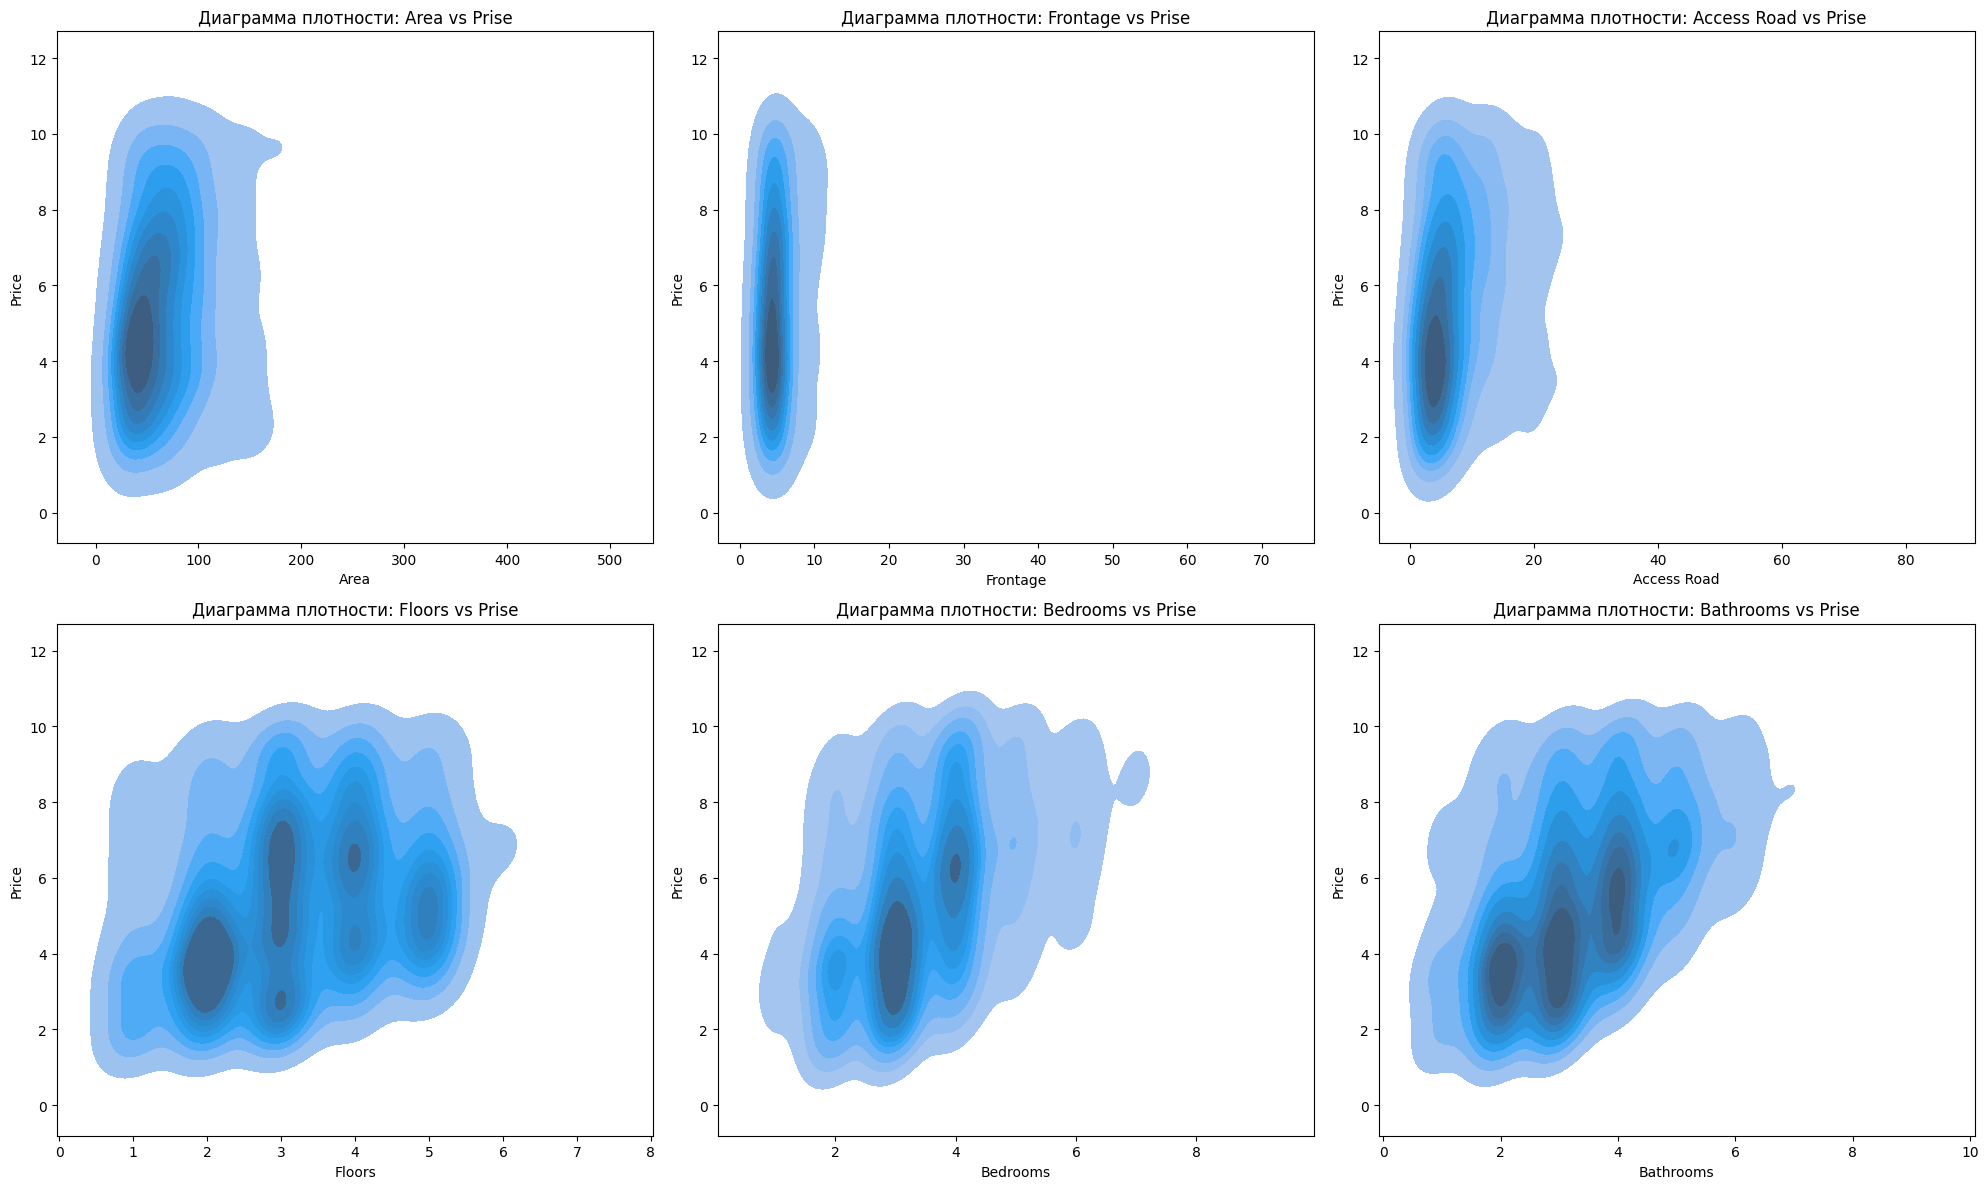

In [ ]:
# @title Визуализация данных
numeric_features1 = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms']

# Создание подграфиков
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Построение KDE для каждого числового признака
for i, feature in enumerate(numeric_features1):
    sns.kdeplot(x=feature, y='Price', data=df_dropna, fill=True, ax=axes[i])
    axes[i].set_title(f'Диаграмма плотности: {feature} vs Prise')

# Отображение графиков
plt.tight_layout()
plt.show()

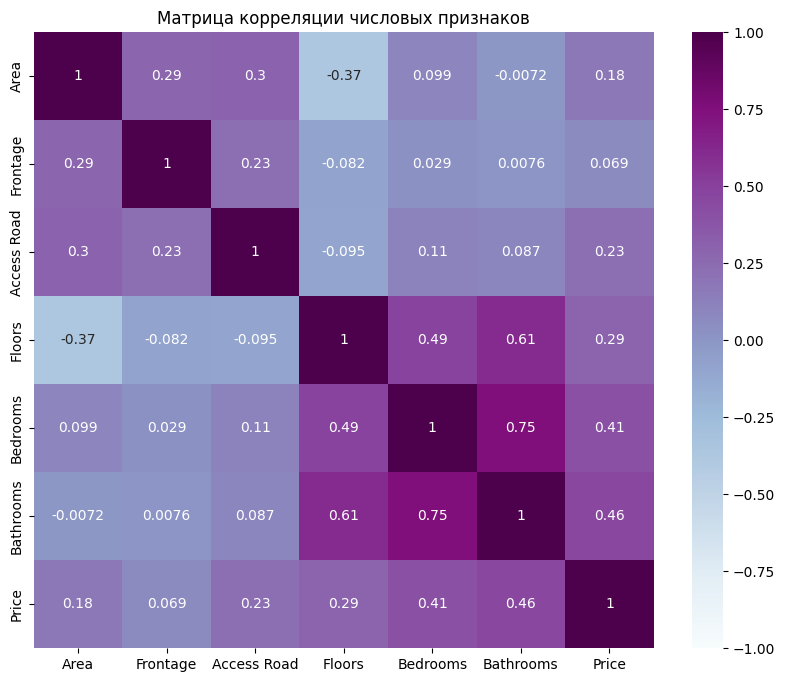

In [ ]:
#@title Матрица корреляции
# Стандартизация данных
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

# Преобразование обратно в DataFrame для удобства
numeric_features_scaled_df = pd.DataFrame(numeric_features_scaled, columns=numeric_features.columns)

# Вычисление матрицы корреляции
correlation_matrix = numeric_features_scaled_df.corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu',vmin = -1, vmax = 1)
plt.title('Матрица корреляции числовых признаков')
plt.show()


<ipython-input-80-62be82971a30>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df_legal = df.groupby('Legal status', group_keys=False).apply(lambda x: x.sample(min_count_legal, random_state=42)).reset_index(drop=True)
<ipython-input-80-62be82971a30>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = sampled_df_legal.groupby('Furniture state', group_keys=False).apply(lambda x: x.sample(m

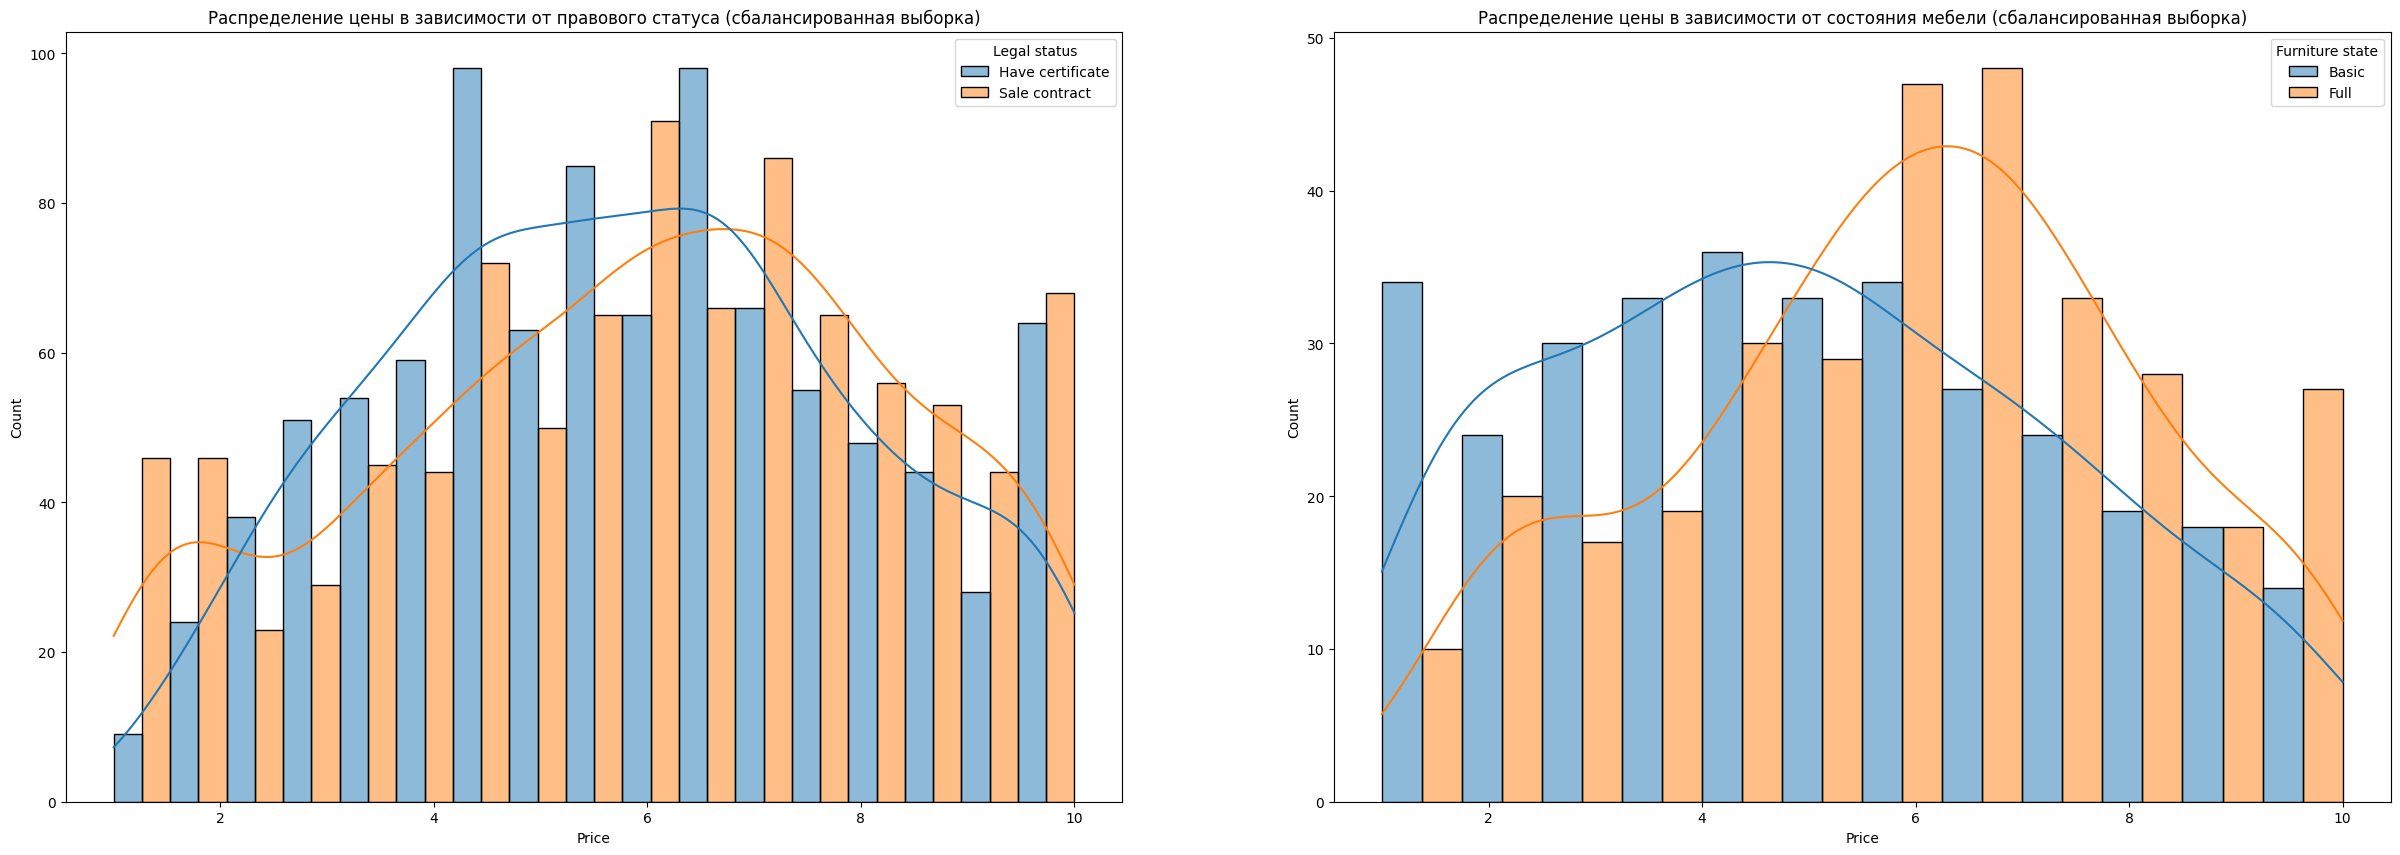

In [ ]:
# Балансировка данных по признаку Legal status
min_count_legal = df['Legal status'].value_counts().min()
sampled_df_legal = df.groupby('Legal status', group_keys=False).apply(lambda x: x.sample(min_count_legal, random_state=42)).reset_index(drop=True)

# Балансировка данных по признаку Furniture state
min_count_furniture = sampled_df_legal['Furniture state'].value_counts().min()
sampled_df = sampled_df_legal.groupby('Furniture state', group_keys=False).apply(lambda x: x.sample(min_count_furniture, random_state=42)).reset_index(drop=True)

# Создание двух графиков рядом
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Гистограмма для правового статуса
sns.histplot(data=sampled_df_legal, x='Price', hue='Legal status', kde=True, multiple='dodge', ax=axes[0])
axes[0].set_title('Распределение цены в зависимости от правового статуса (сбалансированная выборка)')

# Гистограмма для состояния мебели
sns.histplot(data=sampled_df, x='Price', hue='Furniture state', kde=True, multiple='dodge', ax=axes[1])
axes[1].set_title('Распределение цены в зависимости от состояния мебели (сбалансированная выборка)')

# Отображение графиков
plt.show()

<ipython-input-81-7b3d7d4ddd3a>:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('House direction', group_keys=False).apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


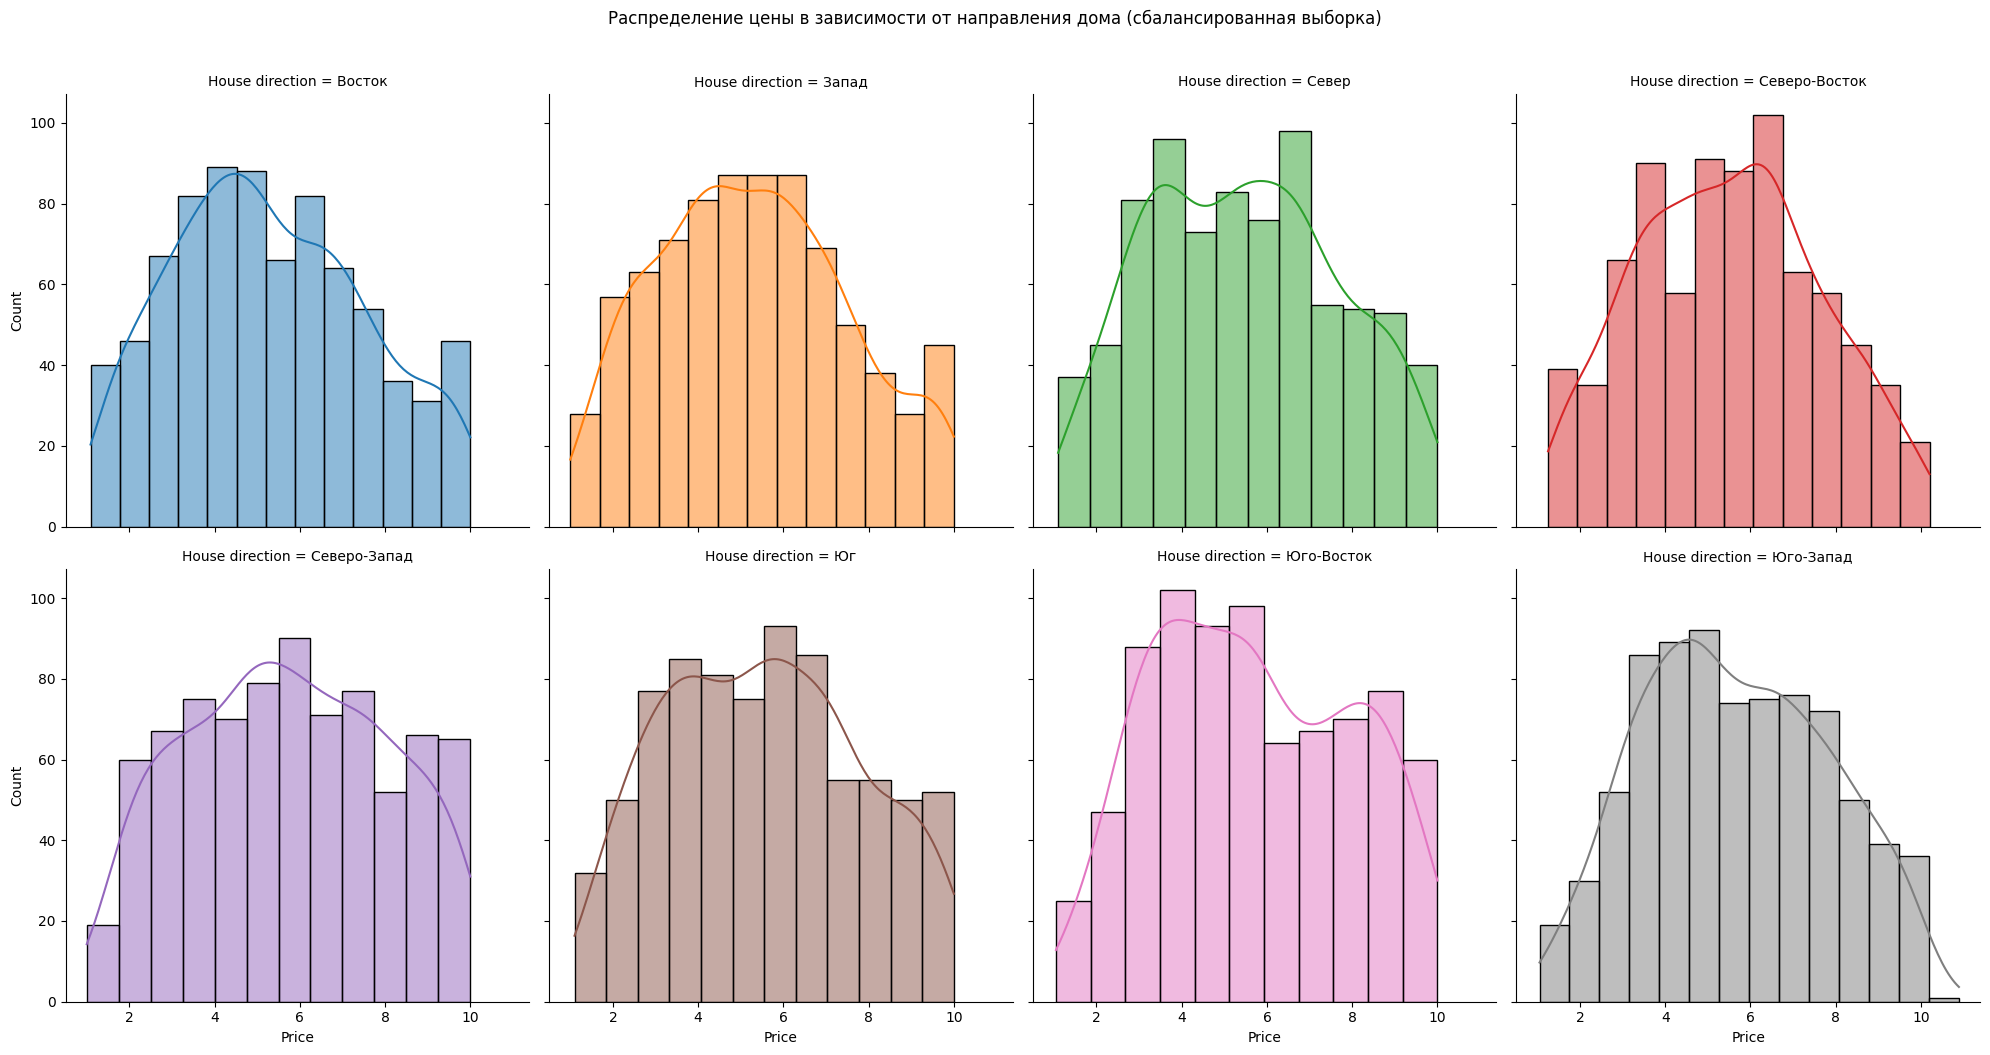

In [ ]:
# @title Направление дома

# Создание словаря для замены значений
direction_mapping = {
    'Bắc': 'Север',
    'Nam': 'Юг',
    'Đông': 'Восток',
    'Tây': 'Запад',
    'Đông - Bắc': 'Северо-Восток',
    'Tây - Bắc': 'Северо-Запад',
    'Đông - Nam': 'Юго-Восток',
    'Tây - Nam': 'Юго-Запад'
}

# Замена значений в столбце House direction
df['House direction'] = df['House direction'].map(direction_mapping)

# Замена значений в столбце Balcony direction
df['Balcony direction'] = df['Balcony direction'].map(direction_mapping)

# Балансировка данных по признаку House direction
min_count = df['House direction'].value_counts().min()
sampled_df = df.groupby('House direction', group_keys=False).apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# Создание FacetGrid для House direction
g = sns.FacetGrid(sampled_df, col='House direction', col_wrap=4, height=5, hue='House direction', palette='tab10')
g.map(sns.histplot, 'Price', kde=True)
g.fig.suptitle('Распределение цены в зависимости от направления дома (сбалансированная выборка)', y=1.05)

# Отображение графиков
plt.show()

<ipython-input-82-b1affe0331d4>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Balcony direction').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


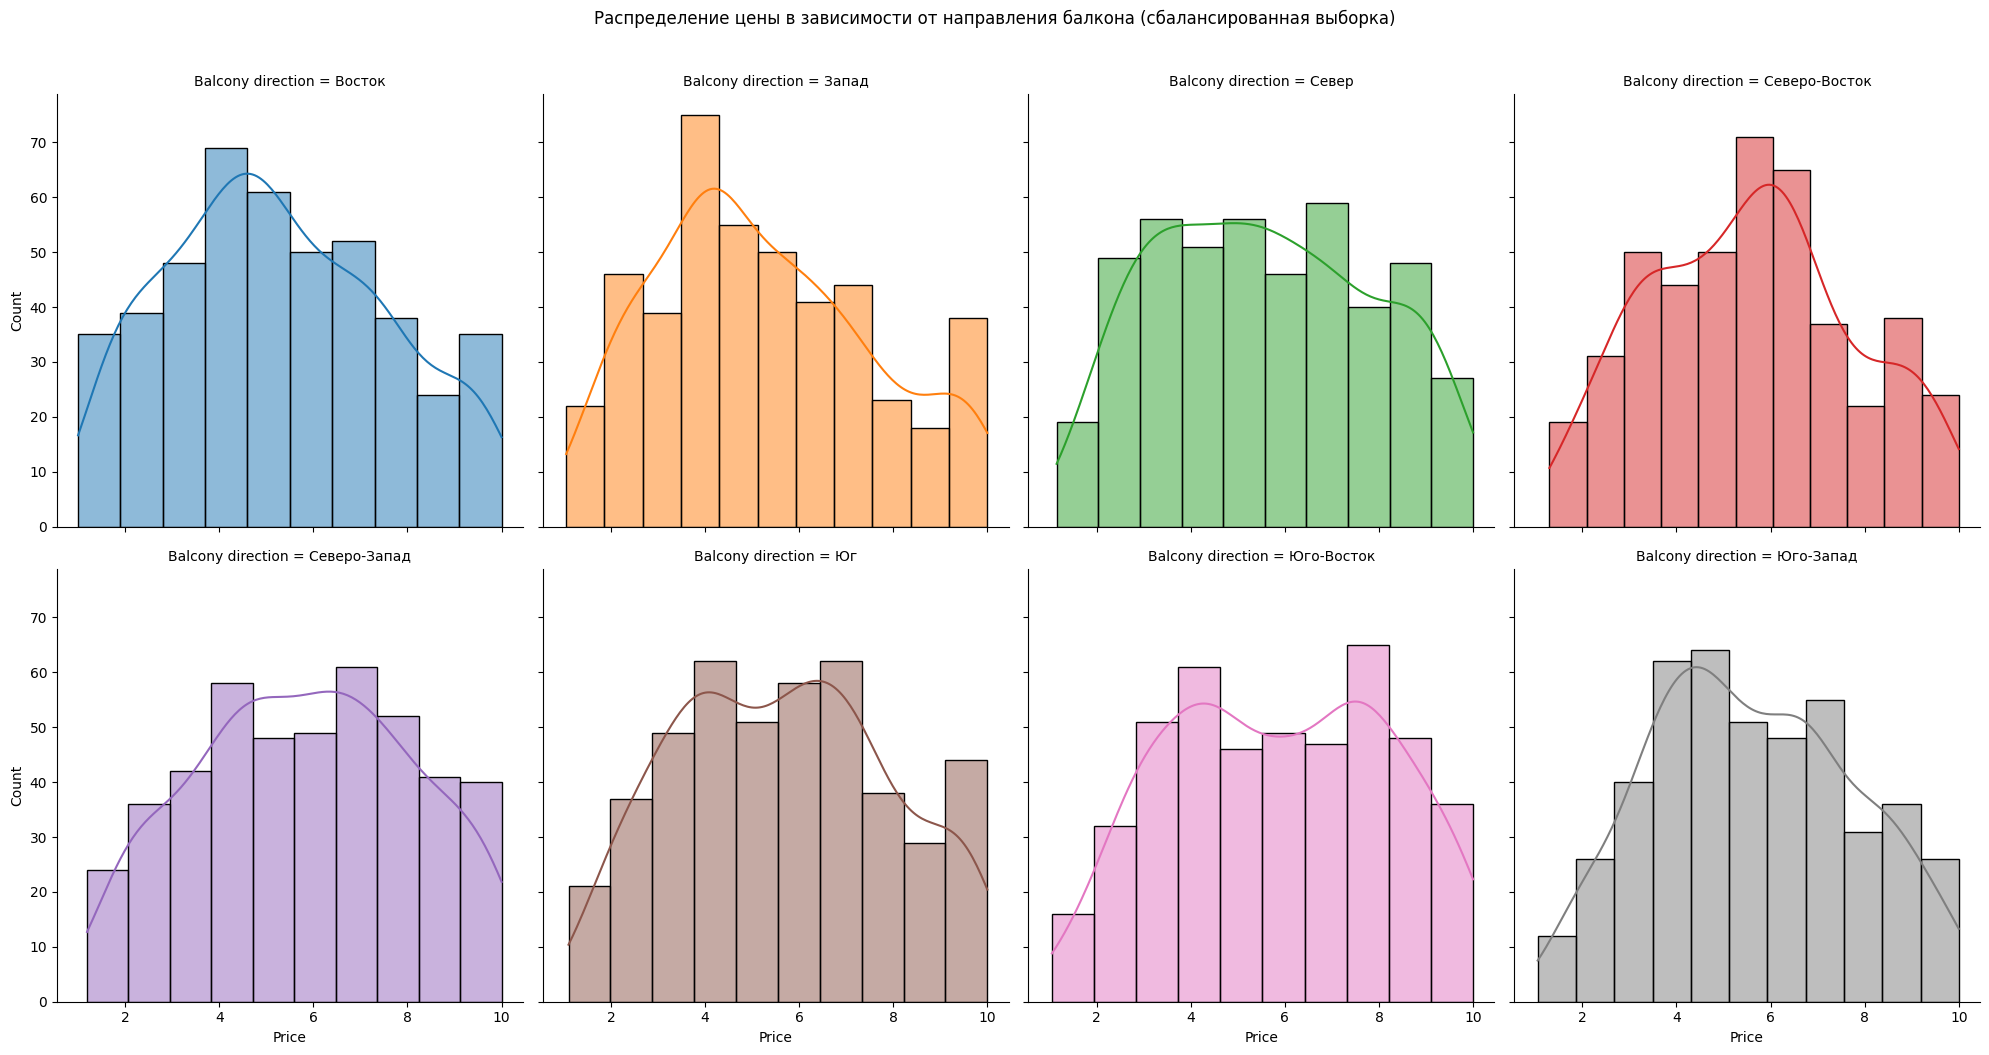

In [ ]:
# @title Направление балкона
# Балансировка данных по признаку Balcony direction
min_count = df['Balcony direction'].value_counts().min()
sampled_df = df.groupby('Balcony direction').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# Создание FacetGrid для Balcony direction
g = sns.FacetGrid(sampled_df, col='Balcony direction', col_wrap=4, height=5, hue='Balcony direction', palette='tab10')
g.map(sns.histplot, 'Price', kde=True)
g.fig.suptitle('Распределение цены в зависимости от направления балкона (сбалансированная выборка)', y=1.05)

# Отображение графиков
plt.show()

In [7]:
# @title  Обработка категориальных признаков и заполнение пропусков
# Проверка наличия пропущенных значений
print(df.isnull().sum())

# Определение числовых и категориальных признаков
numeric_features = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']
categorical_features = ['Legal status', 'Furniture state', 'House direction', 'Balcony direction']

# Обработка категориальных признаков и заполнение пропусков
for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df.loc[:, feature] = df[feature].fillna(mode_value)

# Label Encoding для категориальных признаков
label_encoder = LabelEncoder()
label_encoded_df = df[categorical_features].apply(label_encoder.fit_transform)

# Замена категориальных признаков в исходном DataFrame на закодированные значения
df[categorical_features] = label_encoded_df

# Выбор только числовых признаков
df = df.select_dtypes(include=[np.number])

# Функция для заполнения пропущенных значений с использованием модели случайного леса
def fill_missing_values_with_model(df, target_column):
    # Копирование датафрейма
    df_filled = df.copy()

    # Итерация по каждому признаку
    for column in df_filled.columns:
        if df_filled[column].isnull().any():
            # Создание модели случайного леса
            model = RandomForestRegressor(random_state=42)

            # Выбор признаков для обучения модели
            features = df_filled.columns[df_filled.columns != column]

            # Разделение данных на обучающую и тестовую выборки
            X_train = df_filled[df_filled[column].notnull()][features]
            y_train = df_filled[df_filled[column].notnull()][column]
            X_test = df_filled[df_filled[column].isnull()][features]

            # Обучение модели
            model.fit(X_train, y_train)

            # Предсказание пропущенных значений
            y_pred = model.predict(X_test)

            # Заполнение пропущенных значений предсказанными значениями
            df_filled.loc[df_filled[column].isnull(), column] = y_pred

    return df_filled

# Заполнение пропущенных значений
df = fill_missing_values_with_model(df, 'Price')

Address                  0
Area                     0
Frontage             11564
Access Road          13297
House direction      21239
Balcony direction    24983
Floors                3603
Bedrooms              5162
Bathrooms             7074
Legal status          4506
Furniture state      14119
Price                    0
dtype: int64


In [ ]:
df

,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,84.0,5.099500,10.009,6,6,4.00,4.02,4.980,0,1,8.60
1,60.0,4.465100,10.235,6,6,5.00,6.02,5.240,0,1,7.50
2,90.0,6.000000,13.000,3,3,5.00,5.35,5.875,1,1,8.90
3,54.0,4.698000,3.500,7,7,2.00,2.00,3.000,0,1,5.35
4,92.0,4.961000,8.655,6,6,2.00,4.00,4.000,0,1,6.90
...,...,...,...,...,...,...,...,...,...,...,...
30224,67.0,4.100000,16.000,6,6,1.00,3.00,2.000,0,1,4.60
30225,30.0,4.233333,3.835,6,6,5.00,3.00,3.000,0,1,4.70
30226,69.4,4.000000,15.000,3,3,2.76,3.83,2.920,0,0,7.50
30227,96.0,4.948500,8.000,6,6,4.00,4.24,4.970,0,1,9.50


In [8]:
# @title  Нормализация данных
# Выбор числовых признаков для нормализации
numeric_features = ['Area', 'Frontage', 'Access Road', 'Floors', 'Bedrooms', 'Bathrooms', 'Price']
standard_scaler = StandardScaler()
df[numeric_features] = standard_scaler.fit_transform(df[numeric_features])

In [ ]:
df

,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,0.322479,-0.056565,0.381228,6,6,0.513351,0.375254,1.199834,0,1,1.233327
1,-0.176803,-0.234129,0.417592,6,6,1.272222,1.971144,1.395686,0,1,0.736003
2,0.447300,0.195479,0.862493,3,3,1.272222,1.436521,1.874018,1,1,1.368960
3,-0.301623,-0.168942,-0.666100,7,7,-1.004392,-1.236594,-0.291657,0,1,-0.236038
4,0.488906,-0.095330,0.163363,6,6,-1.004392,0.359296,0.461621,0,1,0.464736
...,...,...,...,...,...,...,...,...,...,...,...
30224,-0.031179,-0.336317,1.345206,6,6,-1.763263,-0.438649,-1.044935,0,1,-0.575122
30225,-0.800905,-0.298998,-0.612197,6,6,1.272222,-0.438649,-0.291657,0,1,-0.529911
30226,0.018749,-0.364307,1.184302,3,3,-0.427650,0.223645,-0.351919,0,0,0.736003
30227,0.572120,-0.098828,0.057970,6,6,0.513351,0.550802,1.192301,0,1,1.640228


In [9]:
# @title Обработка выбросов и разделение на обучающую и тестовую выборку
# Функция для выделения строк без выбросов
def remove_outliers(df, target_column):
    # Копирование датафрейма
    df_cleaned = df.copy()
    categorical_features = ['Legal status', 'Furniture state', 'House direction', 'Balcony direction']

    # Итерация по каждому признаку
    for column in df.columns:
        if ((column != target_column) and (column !=categorical_features[0])and (column !=categorical_features[1])and (column !=categorical_features[2])and (column !=categorical_features[3])):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Определение границ выбросов
            lower_bound = Q1 - 1.5* IQR
            upper_bound = Q3 + 1.5* IQR

            # Удаление строк с выбросами
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

# Выделение строк без выбросов
df_cleaned = remove_outliers(df, 'Price')

# Разделение данных на обучающую и тестовую выборки
X_cleaned = df_cleaned.drop('Price', axis=1)
y_cleaned = df_cleaned['Price']

X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=42)

# Вывод результатов
print("\nРазмер очищенной обучающей выборки:", X_train.shape)
print("Размер очищенной тестовой выборки:", X_test.shape)



Размер очищенной обучающей выборки: (17772, 10)
Размер очищенной тестовой выборки: (5925, 10)


In [ ]:
df_cleaned

,Area,Frontage,Access Road,House direction,Balcony direction,Floors,Bedrooms,Bathrooms,Legal status,Furniture state,Price
0,0.322479,-0.056565,0.381228,6,6,0.513351,0.375254,1.199834,0,1,1.233327
2,0.447300,0.195479,0.862493,3,3,1.272222,1.436521,1.874018,1,1,1.368960
3,-0.301623,-0.168942,-0.666100,7,7,-1.004392,-1.236594,-0.291657,0,1,-0.236038
4,0.488906,-0.095330,0.163363,6,6,-1.004392,0.359296,0.461621,0,1,0.464736
13,0.468103,0.077476,0.000045,6,6,0.171858,0.877960,0.484220,0,1,1.233327
...,...,...,...,...,...,...,...,...,...,...,...
30224,-0.031179,-0.336317,1.345206,6,6,-1.763263,-0.438649,-1.044935,0,1,-0.575122
30225,-0.800905,-0.298998,-0.612197,6,6,1.272222,-0.438649,-0.291657,0,1,-0.529911
30226,0.018749,-0.364307,1.184302,3,3,-0.427650,0.223645,-0.351919,0,0,0.736003
30227,0.572120,-0.098828,0.057970,6,6,0.513351,0.550802,1.192301,0,1,1.640228


In [ ]:

# Создание модели линейной регрессии
linear_reg = LinearRegression()

# Обучение модели на обучающей выборке
linear_reg.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_test_pred_lr = linear_reg.predict(X_test)

# Оценка модели на тестовой выборке
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

# Вывод результатов на тестовой выборке
print("\nРезультаты модели линейной регрессии на тестовой выборке:")
print("Предсказанные значения на тестовой выборке:")
print(y_test_pred_lr)
print("\nСреднеквадратичная ошибка (MSE) на тестовой выборке:", mse_test_lr)
print("Коэффициент детерминации (R^2) на тестовой выборке:", r2_test_lr)

# Предсказание на обучающей выборке
y_train_pred_lr = linear_reg.predict(X_train)

# Оценка модели на обучающей выборке
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

# Вывод результатов на обучающей выборке
print("\nРезультаты модели линейной регрессии на обучающей выборке:")
print("Предсказанные значения на обучающей выборке:")
print(y_train_pred_lr)
print("\nСреднеквадратичная ошибка (MSE) на обучающей выборке:", mse_train_lr)
print("Коэффициент детерминации (R^2) на обучающей выборке:", r2_train_lr)


Результаты модели линейной регрессии на тестовой выборке:
Предсказанные значения на тестовой выборке:
[-0.28397752  0.14074899  0.21141695 ...  0.35745063  0.64064692
  0.01426687]

Среднеквадратичная ошибка (MSE) на тестовой выборке: 0.6454342494894747
Коэффициент детерминации (R^2) на тестовой выборке: 0.3104273234052365

Результаты модели линейной регрессии на обучающей выборке:
Предсказанные значения на обучающей выборке:
[ 0.50290957 -0.18201877 -0.3563094  ...  0.42548878  0.21197103
 -0.60830649]

Среднеквадратичная ошибка (MSE) на обучающей выборке: 0.6458295939363937
Коэффициент детерминации (R^2) на обучающей выборке: 0.3172421686183672


По сравнению с моделями Линейной регрессии, градиентного бустинга, случайного леса, нейронными сетями и XGBRegresson, модель CatBoost показывает наилучшие результаты.



In [ ]:
# Определение сетки гиперпараметров для CatBoost
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'depth': [4, 6, 8, 10, 12],
    'l2_leaf_reg': [1, 3, 5, 7, 9, 11],
    'iterations': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'early_stopping_rounds': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
# Создание и обучение модели CatBoost с использованием RandomizedSearchCV
cb_regressor = CatBoostRegressor(random_seed=42, verbose=0)
random_search = RandomizedSearchCV(cb_regressor, param_distributions=param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Выбор оптимального значения гиперпараметра
best_params = random_search.best_params_
print(f"\nОптимальные значения гиперпараметров: {best_params}")

# Создание и обучение модели CatBoost с оптимальными значениями гиперпараметров
cb_regressor_best = CatBoostRegressor(**best_params, random_seed=42, verbose=100)
cb_regressor_best.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Предсказание на тестовой выборке
y_test_pred = cb_regressor_best.predict(X_test)

# Оценка модели на тестовой выборке
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов

print("\nПредсказанные значения на тестовой выборке:")
print(y_test_pred)
print("\nСреднеквадратичная ошибка (MSE) на тестовой выборке:", mse_test)
print("Коэффициент детерминации (R^2) на тестовой выборке:", r2_test)

# Предсказание на обучающей выборке
y_train_pred = cb_regressor_best.predict(X_train)

# Оценка модели на обучающей выборке
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Вывод результатов на обучающей выборке
print("\nПредсказанные значения на обучающей выборке:")
print(y_train_pred)
print("\nСреднеквадратичная ошибка (MSE) на обучающей выборке:", mse_train)
print("Коэффициент детерминации (R^2) на обучающей выборке:", r2_train)


Оптимальные значения гиперпараметров: {'learning_rate': 0.1, 'l2_leaf_reg': 5, 'iterations': 800, 'early_stopping_rounds': 80, 'depth': 8}
0:	learn: 0.9424524	test: 0.9372721	best: 0.9372721 (0)	total: 13ms	remaining: 10.4s
100:	learn: 0.6995796	test: 0.7253284	best: 0.7253284 (100)	total: 843ms	remaining: 5.84s
200:	learn: 0.6625540	test: 0.7109418	best: 0.7109418 (200)	total: 1.93s	remaining: 5.76s
300:	learn: 0.6356807	test: 0.7054879	best: 0.7054879 (300)	total: 4.06s	remaining: 6.73s
400:	learn: 0.6144081	test: 0.7011120	best: 0.7011120 (400)	total: 5.4s	remaining: 5.37s
500:	learn: 0.5946846	test: 0.6980520	best: 0.6980520 (500)	total: 6.25s	remaining: 3.73s
600:	learn: 0.5780821	test: 0.6965363	best: 0.6964883 (599)	total: 7.09s	remaining: 2.35s
700:	learn: 0.5628584	test: 0.6956800	best: 0.6956043 (667)	total: 7.94s	remaining: 1.12s
799:	learn: 0.5490578	test: 0.6938539	best: 0.6937319 (785)	total: 8.82s	remaining: 0us

bestTest = 0.6937318507
bestIteration = 785

Shrink model

1. Анализ результатов:

Тестовая выборка:

MSE: 0.4813

R^2: 0.4858

Обучающая выборка:

MSE: 0.3034

R^2: 0.6792

2. Интерпретация результатов:
1) Тестовая выборка:

MSE (Среднеквадратичная ошибка): 0.4813

Интерпретация: Среднеквадратичная ошибка на тестовой выборке составляет 0.4813. Это означает, что в среднем предсказанные значения отклоняются от фактических значений на 0.4813 единиц.

R^2 (Коэффициент детерминации): 0.4858

Интерпретация: Коэффициент детерминации на тестовой выборке составляет 0.4858. Это означает, что модель объясняет 4858% дисперсии целевой переменной. Значение R^2 близко к 0.5, что указывает на среднюю точность модели.

2) Обучающая выборка:

MSE (Среднеквадратичная ошибка): 0.3034

Интерпретация: Среднеквадратичная ошибка на обучающей выборке составляет 0.3034. Это означает, что в среднем предсказанные значения отклоняются от фактических значений на 0.3034 единиц.

R^2 (Коэффициент детерминации): 0.6792

Интерпретация: Коэффициент детерминации на обучающей выборке составляет 0.6792. Это означает, что модель объясняет 66.47% дисперсии целевой переменной. Значение R^2 близко к 0.7, что указывает на хорошую точность модели на обучающей выборке.

3. Выводы:
Точность модели: Модель CatBoost показала среднюю точность на тестовой выборке (R^2 = 0.4858) и хорошую точность на обучающей выборке (R^2 = 0.6792). Это указывает на возможное переобучение модели, так как результаты на обучающей выборке значительно лучше, чем на тестовой.

Переобучение: Переобучение может быть вызвано недостаточным качеством данных, малым объемом данных или недостаточной информативностью признаков.

Оптимальные гиперпараметры: Модель была обучена с оптимальными гиперпараметрами, что улучшило её точность, но не решило проблему переобучения.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Функция для визуализации кластеров
def visualize_clusters(data, labels, title):
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette='viridis', s=100)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Кластеры')
    plt.show()



KMeans:


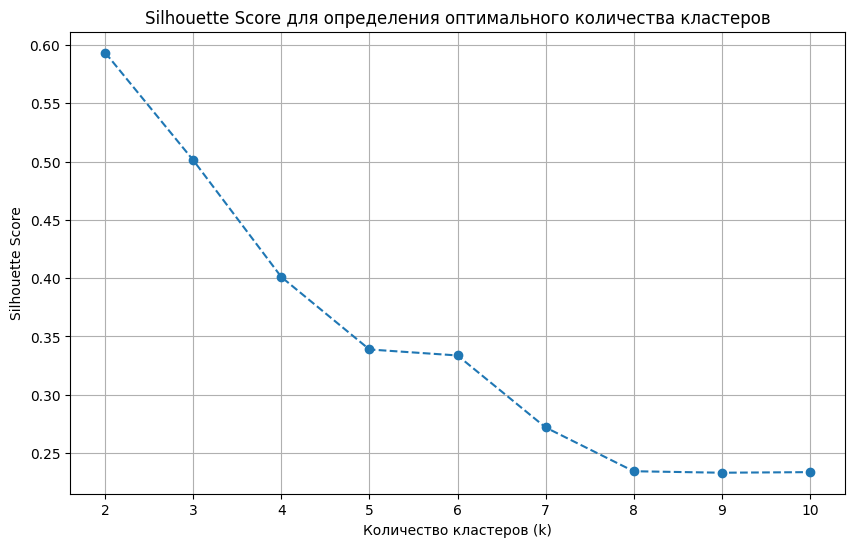

Оптимальное количество кластеров (по Silhouette Score): 2
KMeans Labels: [1 1 0 ... 1 1 1]
KMeans Silhouette Score: 0.5933404350371403
Распределение по кластерам:
             Area  Frontage  Access Road  House direction  Balcony direction  \
Cluster                                                                        
0       -0.087688  -0.18520    -0.136476         1.990068            3.98324   
1       -0.238386  -0.20433    -0.238172         6.829206            6.92674   

           Floors  Bedrooms  Bathrooms  Legal status  Furniture state  
Cluster                                                                
0       -0.204594 -0.204983  -0.194367      0.034761         0.753569  
1        0.062170 -0.133880  -0.070444      0.011380         0.823101  


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Функция для метода локтя (KMeans)
def elbow_method(data, max_clusters=10):
    sse = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)

# Функция для выбора оптимального количества кластеров с использованием Silhouette Score
def find_optimal_k(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):  # Начинаем с 2, так как Silhouette Score требует минимум 2 кластера
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    # Визуализация Silhouette Score
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score для определения оптимального количества кластеров')
    plt.xlabel('Количество кластеров (k)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

    # Выбор оптимального k (максимальный Silhouette Score)
    optimal_k = range(2, max_clusters + 1)[np.argmax(silhouette_scores)]
    print(f"Оптимальное количество кластеров (по Silhouette Score): {optimal_k}")
    return optimal_k

# Применение KMeans с автоматическим выбором оптимального количества кластеров
print("KMeans:")
elbow_method(X_cleaned)  # Метод локтя для выбора оптимального k
optimal_k = find_optimal_k(X_cleaned)  # Поиск оптимального k

# Кластеризация с оптимальным k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_cleaned)
print("KMeans Labels:", kmeans_labels)
print("KMeans Silhouette Score:", silhouette_score(X_cleaned, kmeans_labels))

# Распределение признаков по кластерам для KMeans
def feature_cluster_distribution(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    cluster_distribution = data_with_labels.groupby('Cluster').mean()
    print("Распределение по кластерам:")
    print(cluster_distribution)

feature_cluster_distribution(X_cleaned, kmeans_labels)

# Анализ особенностей K-Means в кластеризации

## 1. Основные принципы работы K-Means
- **Цель**: Минимизировать сумму квадратов расстояний между каждой точкой данных и центром её кластера (центроидом).
- **Алгоритм**:
  1. Инициализация: Случайным образом выбираются K центроидов.
  2. Кластеризация: Каждая точка данных назначается ближайшему центроиду.
  3. Обновление: Пересчитываются центроиды как средние значения всех точек в кластере.
  4. Повторение: Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут изменяться.

---

## 2. Преимущества K-Means
- **Простота и скорость**: Алгоритм легко реализуется и работает быстро на больших наборах данных.
- **Масштабируемость**: Хорошо работает с большими объемами данных.
- **Детерминированность**: При одинаковых начальных условиях (например, случайной инициализации центроидов) алгоритм дает одинаковые результаты.

---

## 3. Ограничения K-Means
- **Требуется заранее заданное K**: Количество кластеров (K) должно быть известно заранее. Если K неизвестно, его нужно определять с помощью методов, таких как метод локтя или Silhouette Score.
- **Чувствительность к выбору начальных центроидов**: Плохая инициализация может привести к локальным минимумам, а не к глобальному оптимуму.
- **Предположение о сферических кластерах**: K-Means предполагает, что кластеры имеют сферическую форму и одинаковый размер. Если данные имеют сложную форму, K-Means может не справиться.
- **Чувствительность к выбросам**: Выбросы могут сильно влиять на положение центроидов, искажая результаты.
- **Требует масштабирования данных**: K-Means чувствителен к масштабу признаков. Если признаки имеют разные диапазоны, их нужно нормализовать (например, с помощью MinMaxScaler или StandardScaler).

---

## 4. Выбор оптимального количества кластеров (K)
- **Метод локтя (Elbow Method)**:
  - Строится график зависимости суммы квадратов расстояний (SSE) от количества кластеров (K).
  - Точка, в которой график "ломается" (локоть), считается оптимальным значением K.
  - Однако метод локтя не всегда дает однозначный ответ, особенно если график не имеет четкого локтя.

- **Silhouette Score**:
  - Оценивает, насколько каждая точка данных похожа на свой кластер по сравнению с другими кластерами.
  - Диапазон значений: от -1 (плохо) до 1 (отлично).
  - Выбирается K, при котором Silhouette Score максимален.

---

## 5. Особенности K-Means в анализе данных
- **Интерпретируемость**:
  - Результаты K-Means легко интерпретировать, так как каждый кластер представлен своим центроидом.
  - Центроиды можно использовать для описания характеристик кластеров.

- **Применение**:
  - K-Means широко используется в маркетинге для сегментации клиентов, в анализе изображений для сжатия данных, в географических данных для кластеризации локаций и т.д.

- **Нормализация данных**:
  - Если признаки имеют разные масштабы, их нужно нормализовать, чтобы избежать смещения в сторону признаков с большими значениями.

- **Обработка выбросов**:
  - Перед применением K-Means рекомендуется удалить или обработать выбросы, чтобы они не искажали результаты.

---

## Получившийся результат K-Means


- **Оптимальное количество кластеров**: 2.
- **Silhouette Score**: 0.593, что указывает на хорошее качество кластеризации.

### Интерпретация кластеров:

- **Кластер 0**:
  - Объекты с меньшими значениями по большинству признаков и более низким уровнем мебели.

- **Кластер 1**:
  - Объекты с большими значениями по некоторым признакам (например, этажность) и более высоким уровнем мебели.

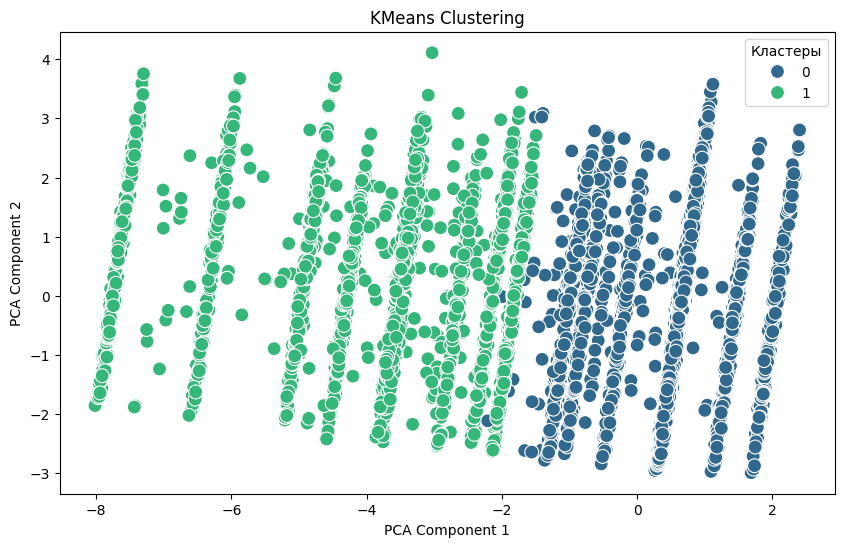

In [ ]:
# Визуализация кластеров для KMeans
visualize_clusters(X_cleaned, kmeans_labels, "KMeans Clustering")


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Пользовательская функция оценки для GridSearchCV
def custom_silhouette_score(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) == 1:  # Если только один кластер, Silhouette Score не может быть вычислен
        return -1  # Возвращаем минимальное значение
    return silhouette_score(X, labels)

# Функция для поиска оптимальных параметров DBSCAN
def optimize_dbscan(data):
    param_grid = {
        'eps': [0.3, 0.5, 0.7, 1.0],
        'min_samples': [3, 5, 7, 10]
    }

    dbscan = DBSCAN()
    grid_search = GridSearchCV(dbscan, param_grid, scoring=custom_silhouette_score, cv=5)
    grid_search.fit(data)

    print("Оптимальные параметры DBSCAN:")
    print(grid_search.best_params_)
    print("Лучший Silhouette Score:", grid_search.best_score_)

    return grid_search.best_estimator_

# Применение DBSCAN
print("\nDBSCAN:")
best_dbscan = optimize_dbscan(X_cleaned)  # Поиск оптимальных параметров
best_dbscan_labels = best_dbscan.fit_predict(X_cleaned)
print("DBSCAN Labels с оптимальными параметрами:", best_dbscan_labels)
if len(set(best_dbscan_labels)) > 1:
    print("DBSCAN Silhouette Score с оптимальными параметрами:", silhouette_score(X_cleaned, best_dbscan_labels))
else:
    print("DBSCAN Silhouette Score: Недоступно (только один кластер)")

# Распределение по кластерам для DBSCAN
feature_cluster_distribution(X_cleaned, best_dbscan_labels)


DBSCAN:
Оптимальные параметры DBSCAN:
{'eps': 1.0, 'min_samples': 10}
Лучший Silhouette Score: -0.09813922665249605
DBSCAN Labels с оптимальными параметрами: [ 0 -1  0 ... -1  0  0]
DBSCAN Silhouette Score с оптимальными параметрами: 0.00445230271143184
Распределение по кластерам:
             Area  Frontage  Access Road  House direction  Balcony direction  \
Cluster                                                                        
-1       0.044933 -0.124287     0.124700         3.607882           4.206897   
 0      -0.238767 -0.204715    -0.239524         5.897083           6.006521   
 1      -0.122831 -0.220323    -0.228491         2.000000           2.000000   
 2      -0.125355 -0.221845    -0.287273         3.000000           3.000000   
 3      -0.204727 -0.223192    -0.300964         4.000000           4.000000   
 4      -0.096852 -0.198846    -0.146955         1.000000           6.000000   
 5      -0.271924 -0.224452    -0.331301         0.000000           0.000000 

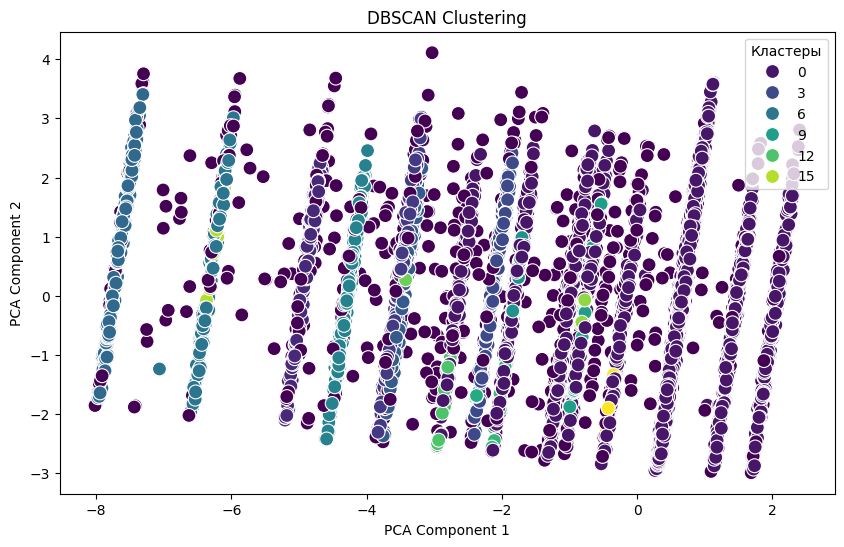

In [ ]:

# Визуализация кластеров для DBSCAN
visualize_clusters(X_cleaned, best_dbscan_labels, "DBSCAN Clustering")


## Описание метода DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который основан на плотности данных. Он позволяет выделять кластеры произвольной формы и автоматически идентифицировать выбросы (шум). DBSCAN не требует заранее задавать количество кластеров, что делает его гибким и удобным для работы с данными сложной структуры.

### Основные принципы работы DBSCAN
1. **Понятие плотности**:
   - DBSCAN определяет кластеры как области с высокой плотностью точек, разделенные областями с низкой плотностью.
   - Плотность точки определяется количеством соседей в пределах заданного радиуса (`eps`).

2. **Параметры алгоритма**:
   - **eps (epsilon)**: Максимальное расстояние между двумя точками, чтобы они считались соседями.
   - **min_samples**: Минимальное количество точек, которое должно быть в окрестности точки, чтобы она считалась "ядровой".

3. **Типы точек**:
   - **Ядровая точка**: Точка, у которой количество соседей в пределах `eps` не меньше `min_samples`.
   - **Граничная точка**: Точка, у которой количество соседей меньше `min_samples`, но она находится в пределах `eps` от ядровой точки.
   - **Выброс (шум)**: Точка, у которой недостаточно соседей для того, чтобы считаться частью кластера.

4. **Алгоритм работы**:
   - Выбирается случайная точка, которая еще не обработана.
   - Если она является ядровой, то формируется кластер, включающий все точки в пределах `eps`.
   - Если точка является граничной, она добавляется в кластер, но не расширяет его.
   - Если точка является выбросом, она помечается как шум.

---

## Анализ результатов DBSCAN

### Оптимальные параметры DBSCAN
- **Параметры**: {'eps': 1.0, 'min_samples': 10}
  - **eps = 1.0**: Точки, находящиеся на расстоянии до 1.0, считаются соседями.
  - **min_samples = 10**: Для того чтобы точка считалась ядровой, она должна иметь как минимум 10 соседей в пределах `eps`.

### Silhouette Score
- **Лучший Silhouette Score**: -0.09813922665249605
  - Отрицательное значение Silhouette Score указывает на плохое качество кластеризации. Это означает, что большинство точек в кластерах находятся ближе к точкам других кластеров, чем к точкам своего кластера.
  - Такой результат может быть связан с тем, что данные имеют сложную структуру, и DBSCAN не смог правильно разделить их на кластеры.

- **Silhouette Score с оптимальными параметрами**: 0.00445230271143184
  - Значение очень близко к нулю, что также указывает на плохое качество кластеризации. Это означает, что точки в кластерах распределены примерно одинаково между своими кластерами и кластерами соседей.

### Результаты кластеризации
- **DBSCAN Labels**: [ 0 -1  0 ... -1  0  0]
  - В результатах кластеризации присутствуют как кластеры (например, `0`), так и выбросы (обозначены как `-1`).
  - Наличие большого количества выбросов (`-1`) может указывать на то, что данные имеют высокую степень шума или что выбранные параметры (`eps` и `min_samples`) не подходят для данных.

---

## Выводы
1. **Качество кластеризации**:
   - DBSCAN показал низкое качество кластеризации, о чем свидетельствует отрицательный и близкий к нулю Silhouette Score.
   - Это может быть связано с тем, что данные имеют сложную структуру, и DBSCAN не смог правильно их разделить.


AgglomerativeClustering:


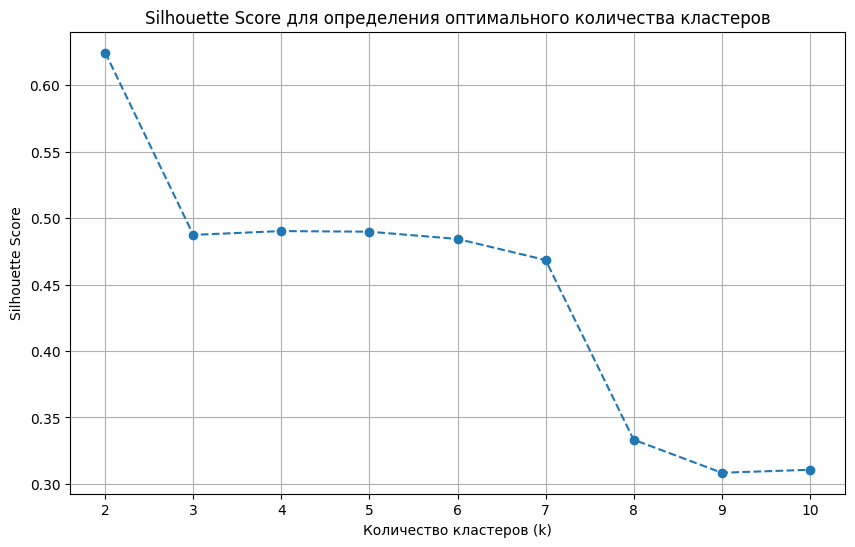

Оптимальное количество кластеров (по Silhouette Score): 2
AgglomerativeClustering Labels: [0 0 0 ... 0 0 0]
AgglomerativeClustering Silhouette Score: 0.6245669487344088
Распределение по кластерам:
             Area  Frontage  Access Road  House direction  Balcony direction  \
Cluster                                                                        
0       -0.219475 -0.201893    -0.224153         5.569842           5.827005   
1       -0.205348 -0.205914    -0.271908         0.462882           0.430859   

           Floors  Bedrooms  Bathrooms  Legal status  Furniture state  
Cluster                                                                
0        0.032984 -0.141140  -0.084373      0.014543         0.817121  
1       -0.212692 -0.283643  -0.243346      0.014556         0.700146  


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Функция для выбора оптимального количества кластеров
def find_optimal_k_agg(data, max_clusters=10, linkage='average'):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):  # Начинаем с 2, так как Silhouette Score требует минимум 2 кластера
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = agg.fit_predict(data)
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)

    # Визуализация Silhouette Score
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
    plt.title('Silhouette Score для определения оптимального количества кластеров')
    plt.xlabel('Количество кластеров (k)')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

    # Выбор оптимального k (максимальный Silhouette Score)
    optimal_k = range(2, max_clusters + 1)[np.argmax(silhouette_scores)]
    print(f"Оптимальное количество кластеров (по Silhouette Score): {optimal_k}")
    return optimal_k

# Применение AgglomerativeClustering с автоматическим выбором оптимального количества кластеров
print("\nAgglomerativeClustering:")
optimal_k_agg = find_optimal_k_agg(X_cleaned, linkage='average')  # Выбор оптимального k

# Кластеризация с оптимальным k
agg = AgglomerativeClustering(n_clusters=optimal_k_agg, linkage='average')
agg_labels = agg.fit_predict(X_cleaned)
print("AgglomerativeClustering Labels:", agg_labels)
print("AgglomerativeClustering Silhouette Score:", silhouette_score(X_cleaned, agg_labels))

# Распределение признаков по кластерам для AgglomerativeClustering
feature_cluster_distribution(X_cleaned, agg_labels)

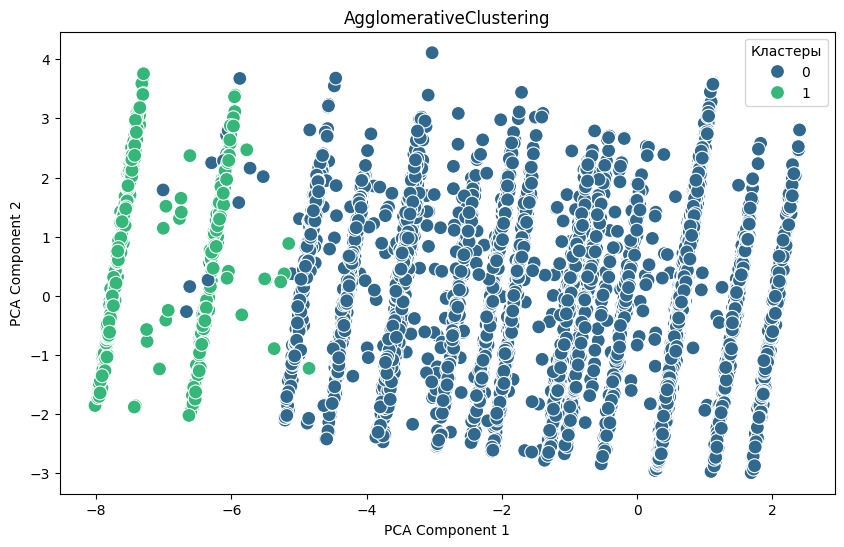

In [ ]:

# Визуализация кластеров для AgglomerativeClustering
visualize_clusters(X_cleaned, agg_labels, "AgglomerativeClustering")

## Описание метода Agglomerative Clustering

Agglomerative Clustering (агломеративная кластеризация) — это иерархический алгоритм кластеризации, который строит кластеры путем объединения (агломерации) точек данных или существующих кластеров. Этот метод не требует заранее задавать количество кластеров, но его можно настроить для работы с фиксированным числом кластеров.

### Основные принципы работы Agglomerative Clustering
1. **Иерархическая структура**:
   - Алгоритм начинает с рассмотрения каждой точки как отдельного кластера.
   - На каждом шаге объединяются два наиболее близких кластера, пока не останется заданное количество кластеров.

2. **Метрика расстояния**:
   - Для определения близости кластеров используется метрика расстояния (например, евклидово расстояние).
   - Выбор метрики влияет на результат кластеризации.

3. **Стратегия объединения (Linkage)**:
   - **Single Linkage**: Расстояние между кластерами определяется как минимальное расстояние между точками в разных кластерах.
   - **Complete Linkage**: Расстояние между кластерами определяется как максимальное расстояние между точками в разных кластерах.
   - **Average Linkage**: Расстояние между кластерами определяется как среднее расстояние между всеми парами точек в разных кластерах.
   - **Ward Linkage**: Минимизирует сумму квадратов отклонений внутри кластеров.

4. **Алгоритм работы**:
   - Начинается с каждой точки как отдельного кластера.
   - На каждом шаге объединяются два наиболее близких кластера.
   - Процесс продолжается до тех пор, пока не останется заданное количество кластеров.

---

## Анализ результатов Agglomerative Clustering

### Оптимальное количество кластеров
- **Оптимальное количество кластеров (по Silhouette Score)**: 2
  - Это означает, что данные можно разделить на два кластера, которые наиболее четко отличаются друг от друга.

### Silhouette Score
- **AgglomerativeClustering Silhouette Score**: 0.6245669487344088
  - Значение Silhouette Score составляет **0.624**, что указывает на хорошее качество кластеризации. Обычно значение Silhouette Score в диапазоне **0.5-0.7** считается приемлемым, а выше **0.7** — очень хорошим.


---

### Распределение по кластерам

| **Признак**         | **Кластер 0**       | **Кластер 1**       |
|---------------------|---------------------|---------------------|
| **Area**            | -0.219475           | -0.205348           |
| **Frontage**        | -0.201893           | -0.205914           |
| **Access Road**     | -0.224153           | -0.271908           |
| **House direction** | 5.569842            | 0.462882            |
| **Balcony direction** | 5.827005          | 0.430859            |
| **Floors**          | 0.032984            | -0.212692           |
| **Bedrooms**        | -0.141140           | -0.283643           |
| **Bathrooms**       | -0.084373           | -0.243346           |
| **Legal status**    | 0.014543            | 0.014556            |
| **Furniture state** | 0.817121            | 0.700146            |

---

### Интерпретация кластеров

#### Кластер 0:
- **Характеристики**:
  - Объекты в этом кластере имеют более высокие значения по признакам `House direction` и `Balcony direction` (5.569842 и 5.827005 соответственно).
  - Значение `Floors` положительное (0.032984), что может указывать на большее количество этажей.
  - Значение `Furniture state` близко к 0.817, что может указывать на преобладание объектов с высоким уровнем мебели (`Full`).

#### Кластер 1:
- **Характеристики**:
  - Объекты в этом кластере имеют более низкие значения по признакам `House direction` и `Balcony direction` (0.462882 и 0.430859 соответственно).
  - Значение `Floors` отрицательное (-0.212692), что может указывать на меньшее количество этажей.
  - Значение `Furniture state` близко к 0.700, что может указывать на преобладание объектов с более низким уровнем мебели (`Basic`).

---

### Выводы
   - Agglomerative Clustering показал хорошее качество кластеризации, о чем свидетельствует значение Silhouette Score **0.624**.